<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 3

## Q1: Lag correlations of weather time series

In [2]:
import numpy as np
import scipy as sc
import math as m
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pylab as P
%matplotlib inline

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]
dc =dc[~np.isnan(dc)]
jb =jb[~np.isnan(jb)]

**1** From the hourly time series at Deep Cove (`dc`), calculate the *lag correlation co-efficient* $\rho_{xx}(\tau)$ out to a lag of $\tau=30\ \mathrm{days}$ (Remember this data is hourly!).  (also remember to remove the mean of $dc$ before trying to do the calculations).  

Comment on the resulting plot.

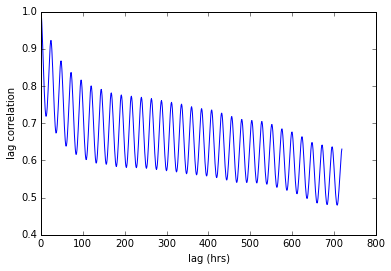

In [3]:
def lagcor(x, minlag, maxlag):
    lag = np.array(range(minlag, maxlag, 1))
    p = 0.*lag 
    x1 = x - np.mean(x)
    cxx1=0.*lag
    
    for i in range(minlag, maxlag, 1):
        if lag[i]<0:
            cxx1[i]=np.mean(x1[:lag[i]]*x1[-lag[i]:])
        elif lag[i]==0.0:
            cxx1[i]=np.mean(x1*x1)
        else:
            cxx1[i]=np.mean(x1[:-lag[i]]*x1[lag[i]:])
        p[i] = cxx1[i]/np.var(x1)
    return [lag, p, x1.size]
T = lagcor(dc, 0, 720)
plt.plot(T[0], T[1])
plt.ylabel('lag correlation')
plt.xlabel('lag (hrs)')

Overall the lag correlation decreases as the lag increases which makes sense. We see the correlation have 30 peaks corresponding to the 30days of lag. The correlation has a local maximum when the lag time differs by exactly a day, and is minimum when the lag differs by a half day ( comparing night and day). So thats pretty fun.

*2* Now, instead of doing the whole year, look at just the winter months and the summer months and compare the lag correlations (no need to do this for the whole time series, just choose one winter and one summer).  Make sure to indicate which lag correlation is which on the plots.

Comment below on the different charcter of these two lag correlations.

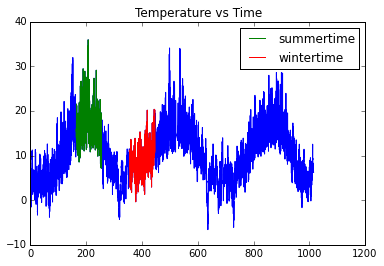

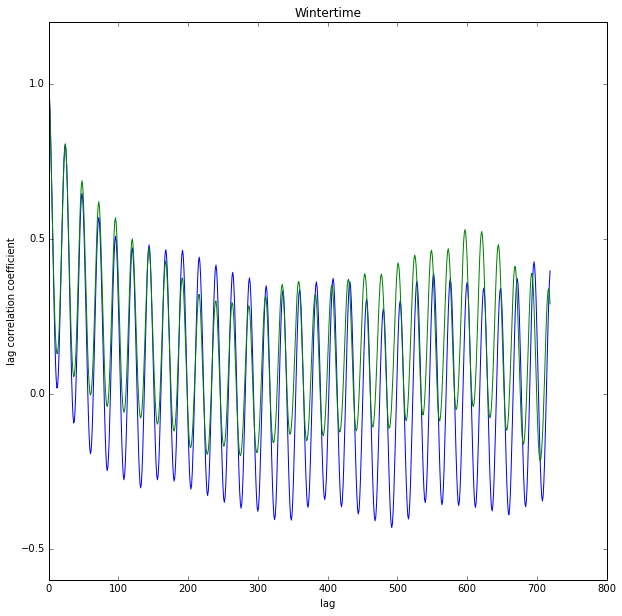

In [13]:
t = np.linspace(0, dc.size, dc.size)
t = t/24
plt.plot(t, dc)

dcsum = dc[3936:6120:]
tsum = t[3936:6120:]
dcwint = dc[8544:10704:]
twint = t[8544:10704:]

plt.plot(tsum, dcsum, label='summertime')
plt.plot(twint, dcwint, label='wintertime')
plt.legend(loc=1)
plt.title('Temperature vs Time')

S = lagcor(dcsum, 0, 720)
W = lagcor(dcwint, 0, 720)

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,1,1); ax1.plot(S[0], S[1]); plt.title('Summertime'); plt.xlabel('lag'); plt.ylabel('lag correlation coefficient')
ax1.plot(W[0], W[1]); plt.title('Wintertime'); plt.xlabel('lag'); plt.ylabel('lag correlation coefficient')

Here we see a similar pattern, again with 30 peaks in each set, corresponding to when the lag differs by multiples of 24 (a complete day). However for both summer and winter plots, the correlation is less, since there is less samples that are correlated, so the lag makes a more significant difference.

## Q2 Emperically show that the expected value of a finite spectrum approaches the true spectrum as T goes to infinity.

**1** Consider the process $x(t) = \int_{t-b}^t y(t) \ \mathrm{dt}$ where $y(t)$ is uncorrelated white noise so that $R_{yy}(\tau)=\delta(\tau)$.  Using the definition of $R_{xx}(\tau)$, and the fact that expectation values (and integration) are linear operators, analytically show that this is a triangle function: 

\begin{equation}
    R_{xx}(\tau)=
    \begin{cases}
        b-|\tau| & |\tau|<b\\
        0 & |\tau|\geq b
    \end{cases}
\end{equation}

Since integration is a linear operator, expectation value of the sum = sum of the expectation values. So here
\begin{equation}
    R_{yy} = \frac{1}{T} \int_{0}^{T} y(t) y( t + \tau ) dt = \delta (\tau ) \\
    R_{xx} = \frac{1}{T} \int_{0}^{T} x(t) x( t + \tau ) dt \\
    R_{xx} (\tau) = \int_{\tau - b}^{\tau } R_{yy} d \tau = \int_{\tau - b}^{\tau } \delta (\tau ) d \tau \\
    R_{xx} (\tau) = b - | \tau | , | \tau | < b
\end{equation}


**2** Show emperically that you have the right *lag auto correlation* by computing the lag correlation of a random discrete timeseries $x(t)$. 

Hint: have a look at `np.convolve` to do the integration. 

Hint 2: Make sure your time series is long enough to get a nice representation of $R_{xx}(\tau)$.  Show what happens if N is too small and what happens if it gets larger. To do this well,  I used `N in [500, 5000, 50000, 5e6]`, but my machine has a good amount of memory.  Don't *test* on the bigger values, as it is slow, just add them for the final product!

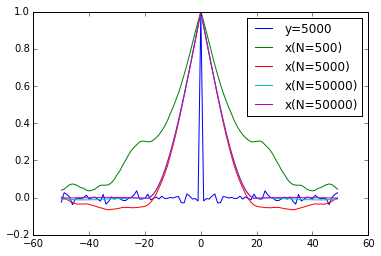

In [5]:
def Rxx(N, tau):
    y = np.random.randn(N)
    ytau = y[tau:]
    b = np.array(range(0,20))
    x = np.convolve(y, b)
    X = lagcor(x, -tau, tau)
    return X
tau = 50
Y = lagcor(np.random.randn(5000), -tau, tau)
plt.plot(Y[0],Y[1], label='y=5000')
X2 = Rxx(500, tau)
plt.plot(X2[0],X2[1], label='x(N=500)')
X3 = Rxx(5000, tau)
plt.plot(X3[0],X3[1], label='x(N=5000)')
X4 = Rxx(50000, tau)
plt.plot(X4[0],X4[1], label='x(N=50000)')
X6 = Rxx(500000, tau)
plt.plot(X6[0],X6[1], label='x(N=50000)')
plt.legend(loc=1)


**3** Derive (or look up) $S_{xx}(f)$ of this process:

\begin{equation}
\begin{aligned}
S_{xx}(f) &= \int_{-\infty}^{\infty} R_{xx}(\tau) e^{-j2 \pi f \tau} d \tau \\
 &= \int_{-\infty}^{-b} 0 \cdot e^{-j2 \pi f \tau} d \tau + \int_{-b}^{b} (b - | \tau |) \cdot e^{-j2 \pi f \tau} d \tau + \int_{b}^{\infty} 0 \cdot e^{-j2 \pi f \tau} d \tau
 &= \big(\frac{sin(2\pi bf)}{2\pi bf} \big)^2
\end{aligned}
\end{equation}


**4** Demonstrate with finite values of $T$ that $\lim_{T->\infty}S_{xx}(f,T) = S_{xx}(f)$ does *not* converge to $S_{xx}(f)$.  Do this by taking longer values of $T$, fitting to the same set of $f$, and graphically showing that the spectral estimate does not improve.  (Do **not** use canned `fft` routines, unless you prove they work first.)

Hints: 
  - When you choose your discrete values of $f$, make sure you don't choose them to be too high (i.e. if you define $\Delta t=1 \ \mathrm{s}$ in your time series above, then there is no need to have frequencies greater than 1 Hz; actually no need to have them greater than 0.5 Hz, as we will see in the next lecture.
  - I would recommend writing a small funtion to do the integration for the Fourier Transform so that you are not rewriting the same code.  To do this, you would do something like:

```python
def dft(x,dt,f): 
    # where x is your time series, dt is the sample rate in seconds, 
    # and f are the frequencies in Hz you want the Fourier Series calculated on
    
    # Your code in here
    return X # where X is your Fourier tranform
```

  - Choose the length of your spectra to go up by decades (i.e. 500,5000,...)
  - use `ax.loglog(f,X)` to make your plots.  We almost always plot spectra using `loglog`.



C:\Anaconda\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


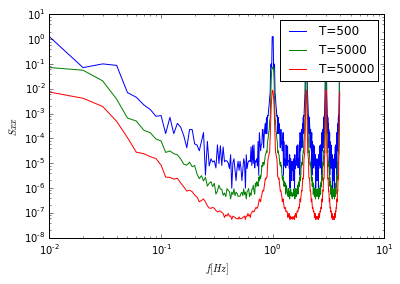

In [6]:
def dft(x,f):
    X =1j*f*0.
    T = x[2]# get the sampling interval
    dt = np.median(np.diff(x[0]))
    for num,ff in enumerate(f):
        X[num] = np.sum(x[1]*np.exp(-1j*2.*np.pi*x[0]*ff)*dt)
    Sxxnew = X*np.conj(X)/T
    return Sxxnew

f = np.arange(-4.,4.,0.01)
x500 = Rxx(500, 50)

Sxx500 = dft(x500,f)

x5000 = Rxx(5000, 50)
Sxx5000 = dft(x5000, f)

x50000 = Rxx(50000, 50)
Sxx50000= dft(x50000, f)

                   
fig,ax=plt.subplots()
ax.loglog(f[f>0],2*Sxx500[f>0],label='T=500')
ax.loglog(f[f>0],2*Sxx5000[f>0],label='T=5000')
ax.loglog(f[f>0],2*Sxx50000[f>0],label='T=50000')
ax.set_xlabel(r'$f [Hz]$')
ax.set_ylabel(r'$Sxx$')
ax.legend(loc=1)

as a larger T value is used, the noise is reduced from the Fourier transform, and the peak frequencies became sharp and clean.

**5** Now demonstrate that the *expected value* of 

$$E\left[\lim_{T->\infty}S_{xx}(f,T)\right]$$ 

approaches $S_{xx}(f)$ by *averaging* a number of your moderate lengthed spectral estimates together.  Comment on the form of the spectrum relative to how you made the timeseries.

Hints:
  
  - Just do what you did above, but average the results of `navg` non-overlapping segments of data.  
  - This gets computationally expensive, I did `navg` of `1, 5, 50, 100` and got nice results.  Test your code on just `navg` of `1` and `5`, and when its working add the higher numbers.

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: ComplexWarning: Casting complex values to real discards the imaginary part


(0, 4)

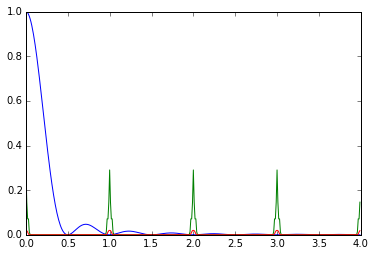

In [7]:
T = np.array([1, 5, 10, 50, 100, 2000, 5000, 10000, 100000, 500000])
Sxx = np.zeros((T.size, f.size))

for ind, t in enumerate(T):
    Sxx[ind] = dft(Rxx(t*20,21), f)

Sxxav = f*0.   
for ind, i in enumerate(Sxx[0]):
    for j in range(0,T.size-1,):
        Sxxav[ind] = Sxxav[ind] + Sxx[j][ind]

Sxxav = Sxxav/T.size
        
Sxxf = f*0.
for ind, ff in enumerate(f):
    Sxxf[ind] = ((m.sin(2*m.pi*ff))/(m.pi*2*ff))
plt.plot(f, Sxxf**2)
plt.plot(f, Sxxav**2)
plt.plot(f, Sxx[3]**2)
plt.xlim(0, 4)

The averaging of the Sxx values based on the interval length does not appear to approach the Sxx(f), even when the value in increased dramatically. Spikes occur when the sinc function goes to a minimum.